<a href="https://colab.research.google.com/github/theeprologue/Portfolio-Work/blob/master/Banking_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader .data as web
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sdate = dt.datetime(2020,1,6)
edate = dt.datetime.now()
absa = web.DataReader('ABG.JO', data_source='yahoo', start=sdate, end=edate)
capitec = web.DataReader('CPI.JO', data_source='yahoo', start=sdate, end=edate)
first = web.DataReader('FSR.JO', data_source='yahoo', start=sdate, end=edate)
rmb = web.DataReader('RMH.JO', data_source='yahoo', start=sdate, end=edate)
nedbank = web.DataReader('NED.JO', data_source='yahoo', start=sdate, end=edate)
standard = web.DataReader('SBK.JO', data_source='yahoo', start=sdate, end=edate)


Text(0.5, 0, 'Date')

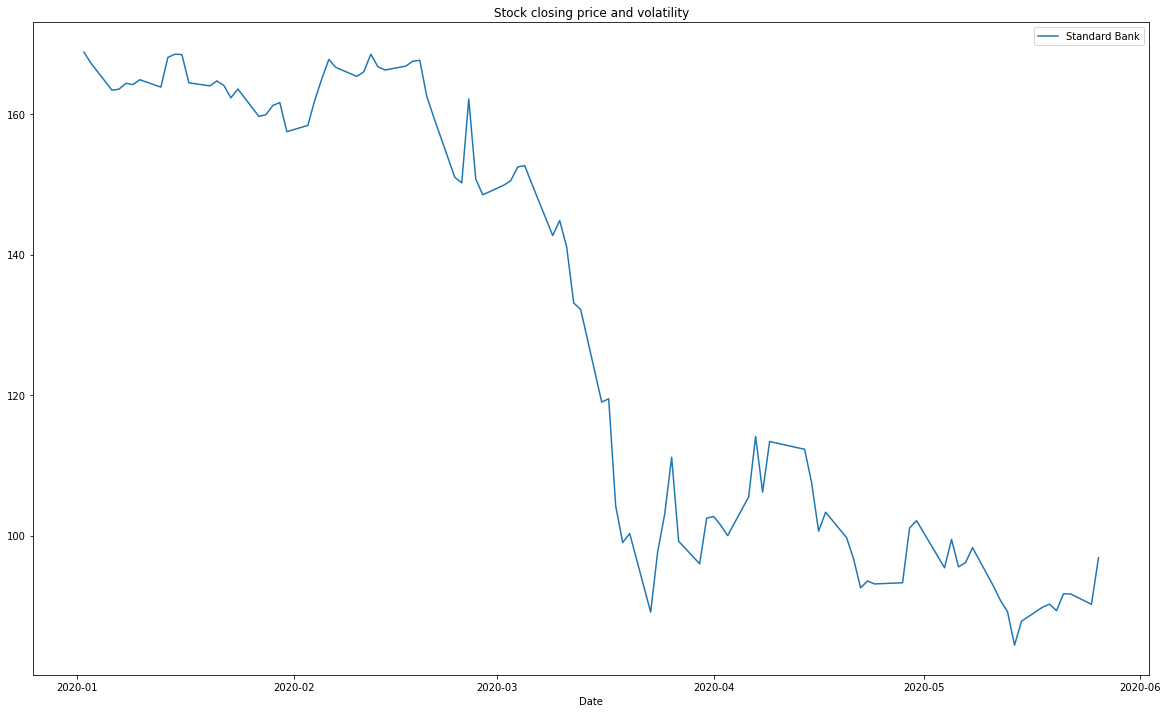

In [16]:
plt.figure(figsize=(20,12))
plt.title("Stock closing price and volatility")
#sns.lineplot(data=absa['Close']/100, label="Absa")
#sns.lineplot(data=capitec['Close']/100, label="Capitec")
#sns.lineplot(data=first['Close']/100, label="First Rand")
#sns.lineplot(data=rmb['Close']/100, label="Rand Merchant")
#sns.lineplot(data=nedbank['Close']/100, label="Nedbank")
sns.lineplot(data=standard['Close']/100, label="Standard Bank")
plt.xlabel("Date")

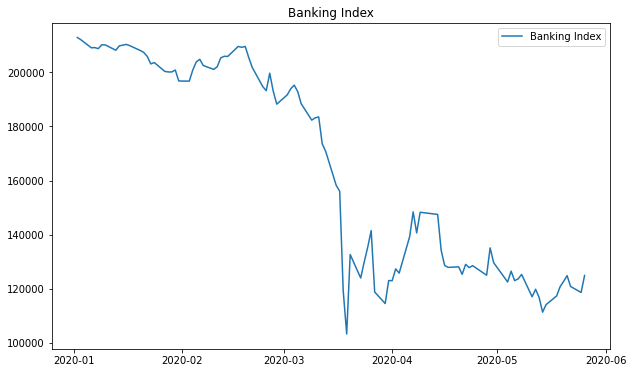

In [17]:
bank_index = absa['Close'] + capitec['Close'] + rmb['Close'] + nedbank['Close'] + first['Close'] + standard['Close']
plt.figure(figsize=(10,6))
plt.title("Banking Index")
sns.lineplot(data=bank_index, label='Banking Index')

In [4]:
bank_index.head(1)
bank_index.tail(1)

Date
2020-05-26    123654.0
Name: Close, dtype: float64

In [22]:
#Compute Volatility
absa_close = absa['Close']
absa_close_shift = absa['Close'].shift(1)
absa['U_sequence'] = np.log(absa_close/absa_close_shift)
absa_U_sequence = absa['U_sequence']
absa_s = absa_U_sequence.rolling(window=252).std()
absa['volatility'] = absa_U_sequence.rolling(window=252).std()*np.sqrt(252)
absa['volatility'].mean()

capitec_close = capitec['Close']
capitec_close_shift = capitec['Close'].shift(1)
capitec['U_sequence'] = np.log(capitec_close/capitec_close_shift)
capitec_U_sequence = capitec['U_sequence']
capitec_s = capitec_U_sequence.rolling(window=252).std()
capitec['volatility'] = capitec_U_sequence.rolling(window=252).std()*np.sqrt(252)
capitec['volatility'].mean()

first_close = first['Close']
first_close_shift = first['Close'].shift(1)
first['U_sequence'] = np.log(first_close/first_close_shift)
first_U_sequence = first['U_sequence']
first_s = first_U_sequence.rolling(window=252).std()
first['volatility'] = first_U_sequence.rolling(window=252).std()*np.sqrt(252)
first['volatility'].mean()

nedbank_close = nedbank['Close']
nedbank_close_shift = nedbank['Close'].shift(1)
nedbank['U_sequence'] = np.log(nedbank_close/nedbank_close_shift)
nedbank_U_sequence = nedbank['U_sequence']
nedbank_s = nedbank_U_sequence.rolling(window=252).std()
nedbank['volatility'] = nedbank_U_sequence.rolling(window=252).std()*np.sqrt(252)
nedbank['volatility'].mean()

rmb_close = rmb['Close']
rmb_close_shift = rmb['Close'].shift(1)
rmb['U_sequence'] = np.log(rmb_close/rmb_close_shift)
rmb_U_sequence = rmb['U_sequence']
rmb_s = rmb_U_sequence.rolling(window=252).std()
rmb['volatility'] = rmb_U_sequence.rolling(window=252).std()*np.sqrt(252)
rmb['volatility'].mean()

standard_close = standard['Close']
standard_close_shift = standard['Close'].shift(1)
standard['U_sequence'] = np.log(standard_close/standard_close_shift)
standard_U_sequence = standard['U_sequence']
standard_s = standard_U_sequence.rolling(window=252).std()
standard['volatility'] = standard_U_sequence.rolling(window=252).std()*np.sqrt(252)
standard['volatility'].mean()

nan

# New Section

In [19]:
from __future__ import print_function
from ortools.linear_solver import pywraplp

#price*Capitec+price*absa+price*nedbank+price*firstrand
solver = pywraplp.Solver('advertising expenditure', pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)
A = solver.NumVar(0, 500000, 'Absa')
C = solver.NumVar(0, 500000, 'Capitec')
F = solver.NumVar(0, 500000, 'First Rand')
N = solver.NumVar(0, 500000, 'Nedbank')
R = solver.NumVar(0, 500000, 'Rand Merchant')
S = solver.NumVar(0, 500000, 'Standard Bank')

c1 = solver.Constraint(0, 1000000)
c1.SetCoefficient(A, absa['Close'].mean())
c1.SetCoefficient(C, capitec['Close'].mean())
c1.SetCoefficient(F, first['Close'].mean())
c1.SetCoefficient(N, nedbank['Close'].mean())
c1.SetCoefficient(R, rmb['Close'].mean())
c1.SetCoefficient(S, standard['Close'].mean())

c2 = solver.Constraint(0, 21)
c2.SetCoefficient(A, absa['volatility'].mean())
c2.SetCoefficient(C, capitec['volatility'].mean())
c2.SetCoefficient(F, first['volatility'].mean())
c2.SetCoefficient(N, nedbank['volatility'].mean())
c2.SetCoefficient(R, rmb['volatility'].mean())
c2.SetCoefficient(S, standard['volatility'].mean())

objective = solver.Objective()
objective.SetCoefficient(A, 1)    
objective.SetCoefficient(C, 1)    
objective.SetCoefficient(F, 1)    
objective.SetCoefficient(N, 1)
objective.SetCoefficient(R, 1)
objective.SetCoefficient(S,1)
objective.SetMaximization()

solver.Solve()
print('Absa =', A.solution_value())
print('Capitec =', C.solution_value())
print('First Rand =', F.solution_value())
print('Nedbank =', N.solution_value())
print('Rand Merchant =', R.solution_value())
print('Standard Bank =', S.solution_value())

Absa = 0.0
Capitec = 0.0
First Rand = 0.0
Nedbank = 0.0
Rand Merchant = 0.0
Standard Bank = 0.0
